2


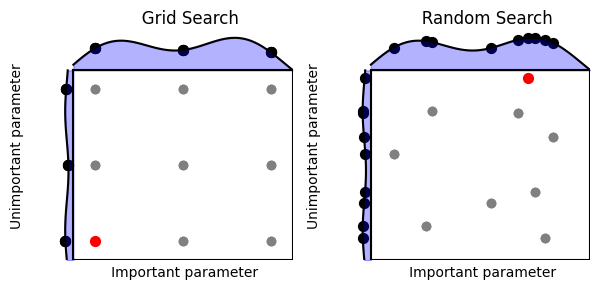

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance function for important parameters
def performance_func(z):
    return ((-z**2 + z + 0.1 * np.sin(10 * z))*0.50)+0.03

# Define the unimportant parameter effect (constant in this case for simplicity)
def unimportant_param_func(z):
    return (0.2 + 0.05 * np.sin(10 * z)) * 0.15

# Combined performance function
def combined_performance(x, y):
    return performance_func(x) + unimportant_param_func(y)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.1, 3))

# Titles for the subplots
ax1.set_title('           Grid Search')
ax2.set_title('           Random Search')

# Labels for the axes
for ax in (ax1, ax2):
    ax.set_xlabel('           Important parameter')
    ax.set_ylabel('Unimportant parameter')
    ax.set_frame_on(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.2, 1)
    ax.set_ylim(0, 1.2)

xlim = 0.1

# Generate grid search points
grid_x = np.linspace(xlim, 1-xlim, 3)
grid_y = np.linspace(xlim, 1-xlim, 3)
grid_xx, grid_yy = np.meshgrid(grid_x, grid_y)
grid_points = np.c_[grid_xx.ravel(), grid_yy.ravel()]

# Generate random search points
#np.random.seed(2)
np.random.seed(10)
random_points = np.random.rand(9, 2)*0.9 + 0.1

for ax in (ax1, ax2):
    # Plot grid search points
    ax2.scatter(random_points[:, 0], random_points[:, 1], color='grey')
    # Plot random search points
    ax1.scatter(grid_points[:, 0], grid_points[:, 1], color='grey')


# Generate performance lines for important parameters
important_param = np.linspace(0, 1, 100)
performance = performance_func(important_param)
unimportant_param = unimportant_param_func(important_param)

box_lim = 0.0

# Plot a box
x1, x2, x3, x4 = [box_lim, box_lim], [1-box_lim, 1-box_lim], [1-box_lim, box_lim], [box_lim, 1-box_lim]

# Plot performance lines
for ax in (ax1, ax2):
    ax.plot(important_param, performance + 1, color='black')  # Adding 0.5 to center the line in the middle
    ax.plot(-unimportant_param , important_param, color='black')  # Adding 0.5 to center the line in the middle

    ax.plot(x1,x3, color='black')
    ax.plot(x2,x3, color='black')
    ax.plot(x4,x1, color='black')
    ax.plot(x4,x2, color='black')


# Highlight the best points based on combined performance
best_grid_idx = np.argmax(combined_performance(grid_points[:, 0], grid_points[:, 1]))
best_random_idx = np.argmax(combined_performance(random_points[:, 0], random_points[:, 1]))

best_grid_point = grid_points[best_grid_idx]
best_random_point = random_points[best_random_idx]

# Plot the best solution found
marker_size = 50
ax1.scatter(best_grid_point[0], best_grid_point[1], color='red', s=marker_size, zorder=5)
ax2.scatter(best_random_point[0], best_random_point[1], color='red', s=marker_size, zorder=5)
print(len(grid_points[1, :]))

# Plot function values for grid search
grid_y = performance_func(grid_points[:, 0])+1
grid_x = -unimportant_param_func(grid_points[:, 1])
ax1.scatter(grid_points[:, 0], grid_y, color='black', s=marker_size)
ax1.scatter(grid_x, grid_points[:, 1], color='black', s=marker_size)

# Plot function values for random search
rs_y = performance_func(random_points[:, 0])+1
rs_x = -unimportant_param_func(random_points[:, 1])
ax2.scatter(random_points[:, 0], rs_y, color='black', s=marker_size)
ax2.scatter(rs_x, random_points[:, 1], color='black', s=marker_size)


for ax in (ax1,ax2):
    # Highlight important and unimportant regions
    ax.fill_betweenx(np.linspace(0, 1, 100), -unimportant_param, color='blue', alpha=0.3)
    ax.fill_between(np.linspace(0, 1, 100), performance+1, 1, color='blue', alpha=0.3)
plt.tight_layout()
plt.savefig("../thesis/img/grid_vs_rs.pdf", format="pdf")
plt.show()


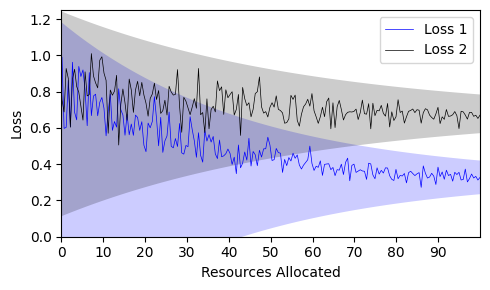

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate sample data
resources = np.linspace(0, 300, 300)
loss1 = 0.25 + (1.4*np.exp(-resources / 100)) + (0.30 * np.random.randn(300) * np.exp(-resources / 110))
loss2 = 0.65 + (np.exp(-resources / 100) * 0.5) + 0.30 * np.random.randn(300) * np.exp(-resources / 120)

smooth_loss1 = 0.25 + (1.4*np.exp(-resources / 100))
smooth_loss2 = 0.65 + (np.exp(-resources / 100) * 0.5)

# Calculate mean and standard deviation for the uncertainty envelopes
mean1 = loss1
std1 = 2.6 * np.exp(-resources / 90) # example of decreasing uncertainty

mean2 = loss2
std2 = 1.3 * np.exp(-resources / 120)  # example of decreasing uncertainty

plt.figure(figsize=(5,3 ))
offset = -50

# ν1 with uncertainty envelope
m1 = np.mean(smooth_loss1[280:299])
plt.plot(resources+offset, mean1, label='Loss 1', color='blue', linewidth=0.5)
plt.fill_between(resources+offset, m1 - std1, m1 + std1, color='blue', alpha=0.2,edgecolor='none')

# ν2 with uncertainty envelope
m2 = np.mean(smooth_loss2[280:299])
plt.plot(resources+offset, mean2, label="Loss 2", color='black', linewidth=0.5)
plt.fill_between(resources+offset, m2 - std2, m2 + std2, color='black', alpha=0.2,edgecolor='none')

# Labels and legend
plt.xlabel('Resources Allocated')
plt.ylabel('Loss')
plt.xlim(50, 250)
plt.xticks(np.arange(50, 250, 20))
plt.gca().set_xticklabels(np.arange(0, 100, 10))
plt.ylim(0, 1.25)
plt.legend()


plt.tight_layout()
plt.savefig("../thesis/img/loss_envelopes.pdf", format="pdf")

# Show plot
plt.show()
